In [6]:
import transportation_tutorials as tt
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Basic Data Visualization

In [9]:
total_florida_vmt = pd.Series({
    2003: 508_607_851,
    2004: 537_494_319,
    2005: 550_614_540,
    2006: 558_308_386,
    2007: 562_798_032,
    2008: 542_334_376,
    2009: 538_088_986,
    2010: 536_315_479,
    2011: 525_630_013,
    2012: 522_879_155,
    2013: 527_950_180,
    2014: 550_795_629,
    2015: 566_360_175,
    2016: 588_062_806,
    2017: 599_522_329,
})

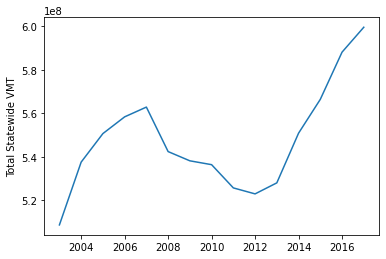

In [11]:
plt.plot(total_florida_vmt)
plt.ylabel("Total Statewide VMT");

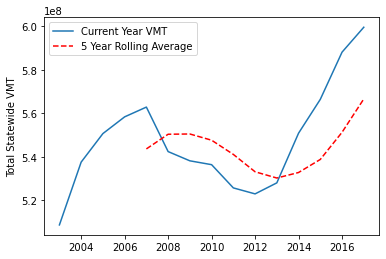

In [13]:
plt.plot(total_florida_vmt, label='Current Year VMT')
plt.plot(total_florida_vmt.rolling(5).mean(), 'r--', label='5 Year Rolling Average')
plt.ylabel("Total Statewide VMT")
plt.legend()

## Multi-Dimensional Data

In [14]:
hh = pd.read_csv(tt.data('SERPM8-BASE2015-HOUSEHOLDS'), index_col=0)
persons = pd.read_csv(tt.data('SERPM8-BASE2015-PERSONS'), index_col=0)
trips = pd.read_csv(tt.data('SERPM8-BASE2015-TRIPS'), index_col=0)

In [15]:
# Add household income to persons
persons = persons.merge(hh.income, left_on='hh_id', right_on=hh.hh_id)

# Count of persons per HH
hh = hh.merge(
    persons.groupby('hh_id').size().rename('hhsize'),
    left_on=['hh_id'],
    right_index=True,
)

# Count of trips per HH
hh = hh.merge(
    trips.groupby(['hh_id']).size().rename('n_trips'),
    left_on=['hh_id'],
    right_index=True,
)

In [16]:
hh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17260 entries, 426629 to 568932
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   hh_id         17260 non-null  int64 
 1   home_mgra     17260 non-null  int64 
 2   income        17260 non-null  int64 
 3   autos         17260 non-null  int64 
 4   transponder   17260 non-null  int64 
 5   cdap_pattern  17260 non-null  object
 6   jtf_choice    17260 non-null  int64 
 7   autotech      17260 non-null  int64 
 8   tncmemb       17260 non-null  int64 
 9   hhsize        17260 non-null  int64 
 10  n_trips       17260 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 1.6+ MB


In [20]:
hh.head()

,hh_id,home_mgra,income,autos,transponder,cdap_pattern,jtf_choice,autotech,tncmemb,hhsize,n_trips
Unnamed: 0,,,,,,,,,,,
426629,1690841,7736,512000,2,1,MMMM0,0,0,0,4,20
426630,1690961,7736,27500,1,0,MNMM0,0,0,0,4,16
426631,1690866,7736,150000,2,0,HMM0,0,0,0,3,10
426632,1690895,7736,104000,2,1,MMMM0,0,0,0,4,10
426633,1690933,7736,95000,2,1,MNM0,0,0,0,3,6


### Scatter Plots

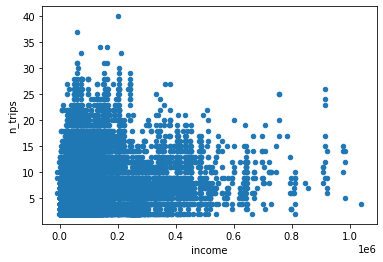

In [21]:
hh.plot(kind='scatter', x='income', y='n_trips');

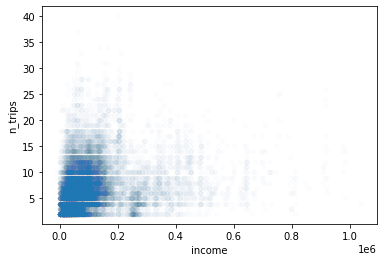

In [22]:
hh.plot(kind='scatter', x='income', y='n_trips', alpha=0.01);

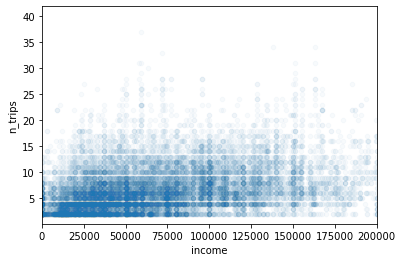

In [26]:
ax = hh.plot(kind='scatter', x='income', y='n_trips', alpha=0.03)
ax.set_xlim(0,200_000);

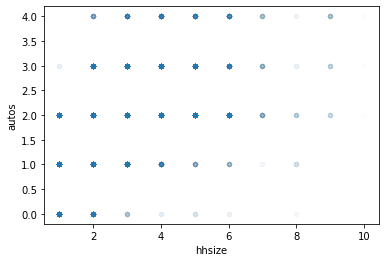

In [27]:
hh.plot(kind='scatter', x='hhsize', y='autos', alpha=0.01);

### Heatmaps

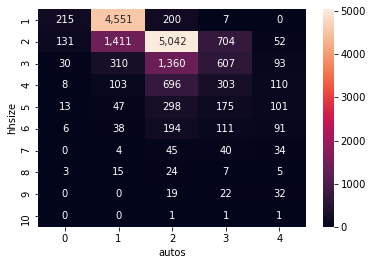

In [28]:
sns.heatmap(
    hh.pivot_table(
        index='hhsize',
        columns='autos',
        aggfunc='size'
    ).fillna(0),
    annot=True,
    fmt=",.0f"
);

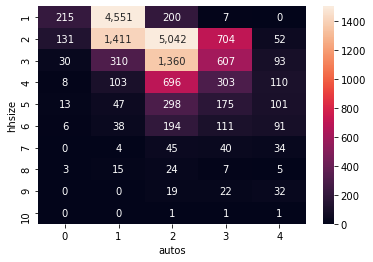

In [29]:
sns.heatmap(
    hh.pivot_table(
        index='hhsize',
        columns='autos',
        aggfunc='size'
    ).fillna(0),
    annot=True,
    fmt=",.0f",
    vmax=1500,
);

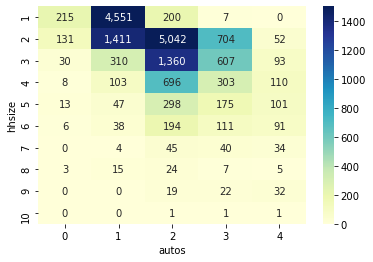

In [30]:
sns.heatmap(
    hh.pivot_table(
        index='hhsize',
        columns='autos',
        aggfunc='size'
    ).fillna(0),
    annot=True,
    fmt=",.0f",
    vmax=1500,
    cmap="YlGnBu",
);

## Box Plots

In [31]:
# Create a hhsize variable capped at 5
hh['hhsize5'] = np.fmin(hh['hhsize'], 5)

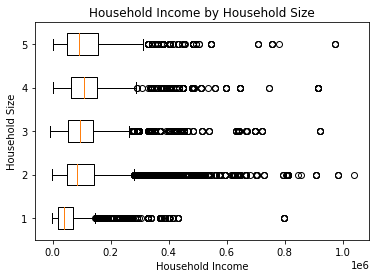

In [34]:
data = list(hh.groupby('hhsize5').income)
plt.boxplot(
    [i[1] for i in data],
    vert=False,
    labels=[i[0] for i in data],
)
plt.title('Household Income by Household Size')
plt.xlabel('Household Income')
plt.ylabel('Household Size');

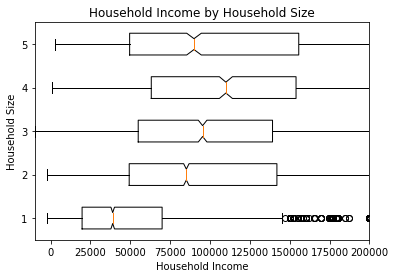

In [35]:

plt.boxplot(
    [i[1] for i in data],
    vert=False,
    labels=[i[0] for i in data],
    notch=True,
)
plt.title('Household Income by Household Size')
plt.xlim(-10_000,200_000)
plt.xlabel('Household Income')
plt.ylabel('Household Size');

## Fancy Figures

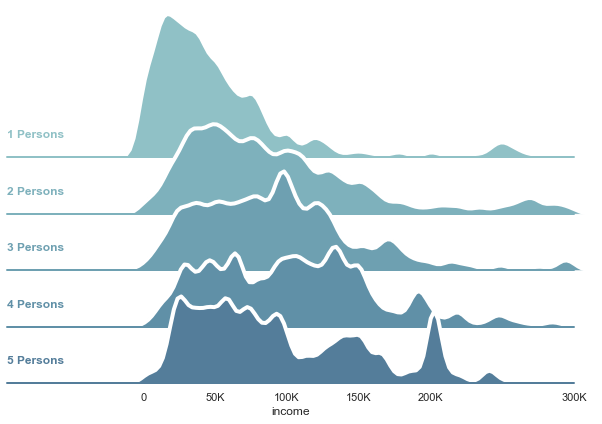

In [36]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(
    hh[hh.income<=300_000], row="hhsize5", hue="hhsize5",
    aspect=7, height=1.25, palette=pal,
    xlim=(-95000,300000)
)

# Draw the densities in a few steps
g.map(sns.kdeplot, "income", clip_on=False, shade=True, alpha=1, lw=1.5, bw=5000)
g.map(sns.kdeplot, "income", clip_on=False, color="w", lw=4, bw=5000)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .15, f'{label} Persons', fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "income")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-0.625)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[],
      xticks=[       0,50_000,100_000,150_000,200_000,300_000],
      xticklabels=['0','50K' ,'100K' ,'150K' ,'200K'  ,'300K',],
     )
g.despine(bottom=True, left=True);
g.row_names = [f'HH Size {i}' for i in g.row_names]

# Histograms and Frequency Plots

## Computing Frequency Data

In [38]:
trips = pd.read_csv(tt.data('SERPM8-BASE2015-TRIPS'))

In [39]:
trips.head()

,hh_id,person_id,person_num,tour_id,stop_id,inbound,tour_purpose,orig_purpose,dest_purpose,orig_mgra,dest_mgra,parking_mgra,stop_period,trip_mode,trip_board_tap,trip_alight_tap,tour_mode,smplRate_geo,autotech,tncmemb
0,1690841,4502948,1,0,-1,0,Work,Home,Work,7736,9290,-1,8,6,0,0,6,1.0,0,0
1,1690841,4502948,1,0,-1,1,Work,Work,Home,9290,7736,0,29,3,0,0,6,1.0,0,0
2,1690841,4502948,1,1,-1,0,Work-Based,Work,Work-Based,9290,7980,-1,13,1,0,0,1,1.0,0,0
3,1690841,4502948,1,1,-1,1,Work-Based,Work-Based,Work,7980,9290,-1,14,1,0,0,1,1.0,0,0
4,1690841,4502948,1,2,-1,0,Work-Based,Work,Work-Based,9290,10608,-1,19,3,0,0,3,1.0,0,0


In [40]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123874 entries, 0 to 123873
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   hh_id            123874 non-null  int64  
 1   person_id        123874 non-null  int64  
 2   person_num       123874 non-null  int64  
 3   tour_id          123874 non-null  int64  
 4   stop_id          123874 non-null  int64  
 5   inbound          123874 non-null  int64  
 6   tour_purpose     123874 non-null  object 
 7   orig_purpose     123874 non-null  object 
 8   dest_purpose     123874 non-null  object 
 9   orig_mgra        123874 non-null  int64  
 10  dest_mgra        123874 non-null  int64  
 11  parking_mgra     123874 non-null  int64  
 12  stop_period      123874 non-null  int64  
 13  trip_mode        123874 non-null  int64  
 14  trip_board_tap   123874 non-null  int64  
 15  trip_alight_tap  123874 non-null  int64  
 16  tour_mode        123874 non-null  int6

In [57]:
trip_mode_counts = trips.trip_mode.value_counts(sort=False)
trip_mode_counts

1     77187
2      6659
3     19264
4      1348
5     10355
6       872
9      3290
10     1563
11      330
14        6
15       16
16        5
17        9
18        5
19       18
20     2947
Name: trip_mode, dtype: int64

In [42]:
trip_mode_dictionary = {
    1: "DRIVEALONEFREE",
    2: "DRIVEALONEPAY",
    3: "SHARED2GP",
    4: "SHARED2PAY",
    5: "SHARED3GP",
    6: "SHARED3PAY",
    7: "TNCALONE",
    8: "TNCSHARED",
    9: "WALK",
    10: "BIKE",
    11: "WALK_MIX",
    12: "WALK_PRMW",
    13: "WALK_PRMD",
    14: "PNR_MIX",
    15: "PNR_PRMW",
    16: "PNR_PRMD",
    17: "KNR_MIX",
    18: "KNR_PRMW",
    19: "KNR_PRMD",
    20: "SCHBUS",
}

In [60]:
trip_mode_counts.index = trip_mode_counts.index.map(trip_mode_dictionary)
trip_mode_counts

DRIVEALONEFREE    77187
DRIVEALONEPAY      6659
SHARED2GP         19264
SHARED2PAY         1348
SHARED3GP         10355
SHARED3PAY          872
WALK               3290
BIKE               1563
WALK_MIX            330
PNR_MIX               6
PNR_PRMW             16
PNR_PRMD              5
KNR_MIX               9
KNR_PRMW              5
KNR_PRMD             18
SCHBUS             2947
Name: trip_mode, dtype: int64

In [61]:
trip_mode_counts

DRIVEALONEFREE    77187
DRIVEALONEPAY      6659
SHARED2GP         19264
SHARED2PAY         1348
SHARED3GP         10355
SHARED3PAY          872
WALK               3290
BIKE               1563
WALK_MIX            330
PNR_MIX               6
PNR_PRMW             16
PNR_PRMD              5
KNR_MIX               9
KNR_PRMW              5
KNR_PRMD             18
SCHBUS             2947
Name: trip_mode, dtype: int64

## Plotting Frequency Data

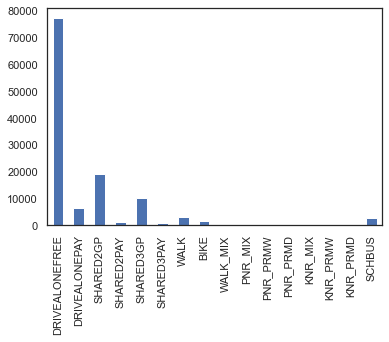

In [62]:
trip_mode_counts.plot(kind='bar');

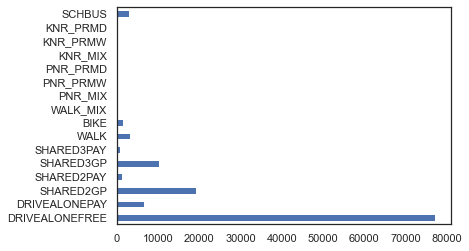

In [63]:
trip_mode_counts.plot(kind='barh');

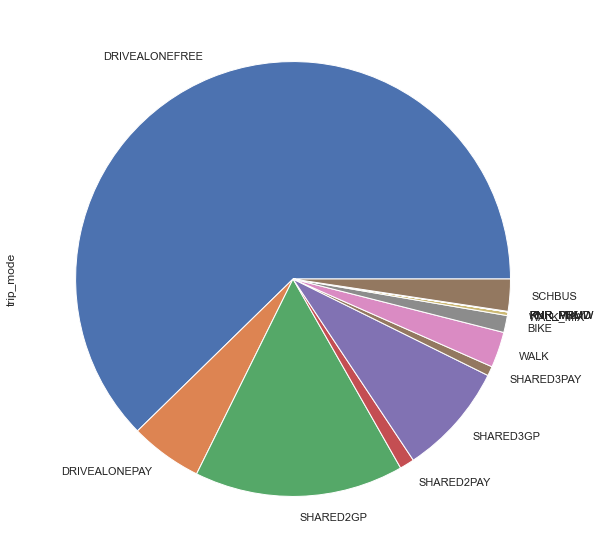

In [64]:
trip_mode_counts.plot(kind='pie',figsize=(10, 10));

### Customizing Plots

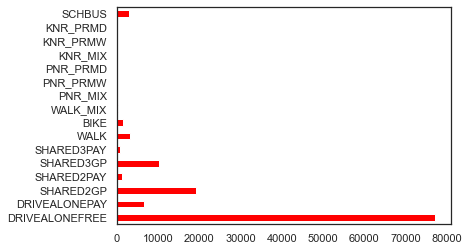

In [65]:
trip_mode_counts.plot(kind='barh', color='red');

pie() got an unexpected keyword argument 'color'


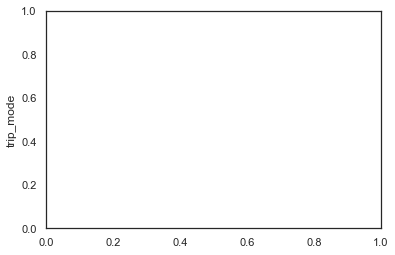

In [66]:
try:
    trip_mode_counts.plot(kind='pie', color='red')
except TypeError as err:
    print(err)

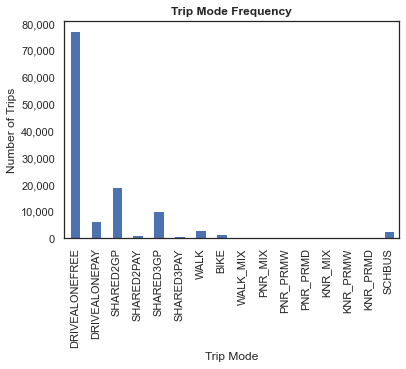

In [67]:
ax = trip_mode_counts.plot(kind='bar')
ax.set_title("Trip Mode Frequency", fontweight='bold')
ax.set_xlabel("Trip Mode")
ax.set_ylabel("Number of Trips");
ax.set_yticklabels([f"{i:,.0f}" for i in ax.get_yticks()])
ax.set_yticks([5000,15000,25000,35000], minor=True);

In [68]:
tm = {11,12,13,14,15,16,17,18,19}
trip_mode_dictionary[21] = 'TRANSIT'
trip_mode_counts = trips.trip_mode.map(lambda x: 21 if x in tm else x).value_counts(sort=False)
trip_mode_counts.index = trip_mode_counts.index.map(trip_mode_dictionary)
trip_mode_counts

DRIVEALONEFREE    77187
DRIVEALONEPAY      6659
SHARED2GP         19264
SHARED2PAY         1348
SHARED3GP         10355
SHARED3PAY          872
WALK               3290
BIKE               1563
SCHBUS             2947
TRANSIT             389
Name: trip_mode, dtype: int64

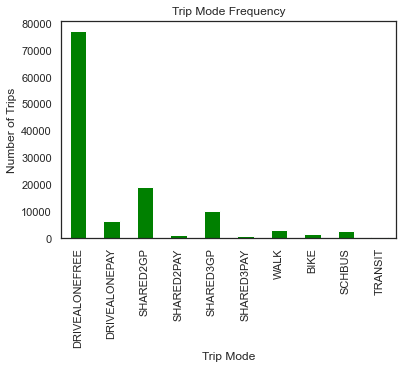

In [69]:
ax = trip_mode_counts.plot(kind='bar', color='green')
ax.set_title("Trip Mode Frequency")
ax.set_xlabel("Trip Mode")
ax.set_ylabel("Number of Trips");

## Plotting Histogram Data

In [70]:
hh = pd.read_csv(tt.data('SERPM8-BASE2015-HOUSEHOLDS'), index_col=0)
hh.set_index('hh_id', inplace=True)

In [71]:
hh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18178 entries, 1690841 to 1726370
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   home_mgra     18178 non-null  int64 
 1   income        18178 non-null  int64 
 2   autos         18178 non-null  int64 
 3   transponder   18178 non-null  int64 
 4   cdap_pattern  18178 non-null  object
 5   jtf_choice    18178 non-null  int64 
 6   autotech      18178 non-null  int64 
 7   tncmemb       18178 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 1.2+ MB


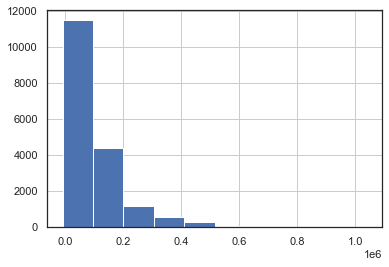

In [72]:
hh.income.hist();

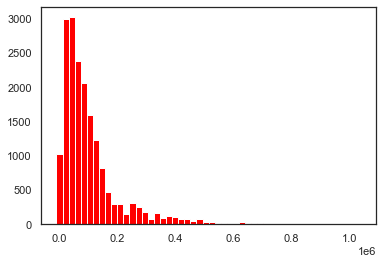

In [73]:
hh.income.hist(bins=50, grid=False, color='red');

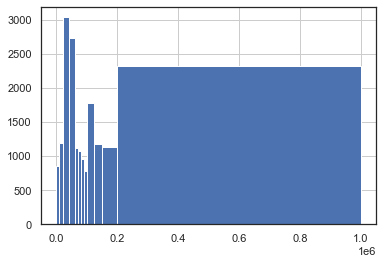

In [74]:
bins = np.array([0,10,20,40,60,70,80,90,100,125,150,200,1000]) * 1000
hh.income.hist(bins=bins);

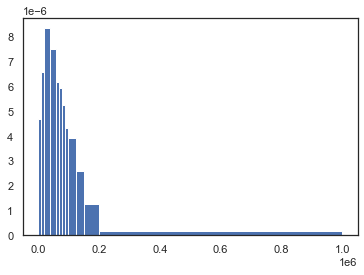

In [76]:
fig, ax = plt.subplots()
ax.hist(hh.income, bins=bins, density=True);

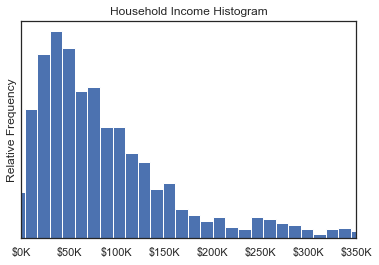

In [77]:
ax = hh.income.hist(grid=False, bins=80)
ax.set_xlim(0,350_000)
ax.set_title("Household Income Histogram");
ax.set_xticklabels([f"${i/1000:.0f}K" for i in ax.get_xticks()]);
ax.set_ylabel("Relative Frequency");
ax.set_yticks([]);